# Basic imports

In [32]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import trackhhl.toy.simple_generator as toy
import trackhhl.hamiltonians.simple_hamiltonian as hamiltonian
import numpy as np
import matplotlib.pyplot as plt
from trackhhl.event_model.event_model import Segment

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Detector

We are going to define a simple detector geometry of 3 parallel infinitely large modules, placed along the $z$-axis

In [33]:
N_MODULES = 3
#test bounds of LX and LY
LX = float("+inf")
LY = float("+inf")
Z_SPACING = 1.0

detector = toy.SimpleDetectorGeometry(
    module_id=list(range(N_MODULES)),
    lx=[LX]*N_MODULES,
    ly=[LY]*N_MODULES,
    z=[i+Z_SPACING for i in range(N_MODULES)])

detector

SimpleDetectorGeometry(module_id=[0, 1, 2], lx=[inf, inf, inf], ly=[inf, inf, inf], z=[1.0, 2.0, 3.0])

# Particle generator

Now we define a simple particle generator that will fire particles flying in straight lines through the our detector.

In [34]:
generator = toy.SimpleGenerator(
    detector_geometry=detector,
    theta_max=np.pi/6
)

Let's generate a simple event

In [89]:
N_PARTICLES = 8
event = generator.generate_event(N_PARTICLES)
print(event.hits)
print(event.tracks)
print(event.modules)

[Hit(hit_id=0, x=-0.4088140273013351, y=-0.3430274963117228, z=1.0, module_id=0, track_id=0), Hit(hit_id=3, x=0.18490814447753898, y=0.22853471550273194, z=1.0, module_id=0, track_id=1), Hit(hit_id=6, x=0.4826363698461219, y=0.06315643815407392, z=1.0, module_id=0, track_id=2), Hit(hit_id=9, x=-0.14986541238668324, y=0.26300519376956233, z=1.0, module_id=0, track_id=3), Hit(hit_id=12, x=-0.3004598102763752, y=-0.24281806535105246, z=1.0, module_id=0, track_id=4), Hit(hit_id=15, x=-0.24436497691644019, y=-0.07592010950395667, z=1.0, module_id=0, track_id=5), Hit(hit_id=18, x=-0.18795185251433452, y=0.07377460499666424, z=1.0, module_id=0, track_id=6), Hit(hit_id=21, x=-0.28880730030403784, y=0.49614898705733707, z=1.0, module_id=0, track_id=7), Hit(hit_id=1, x=-0.8176280546026702, y=-0.6860549926234456, z=2.0, module_id=1, track_id=0), Hit(hit_id=4, x=0.36981628895507795, y=0.4570694310054639, z=2.0, module_id=1, track_id=1), Hit(hit_id=7, x=0.9652727396922438, y=0.12631287630814783, z=

Text(0.5, 0.92, 'Generated event\n3 modules\n8 tracks - 24 hits')

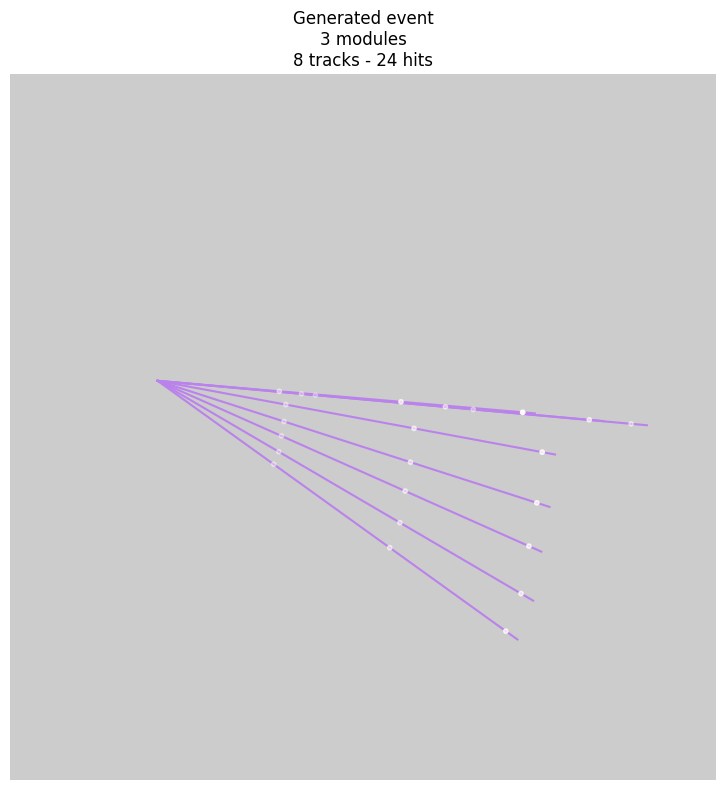

In [90]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = plt.axes(projection='3d')
event.display(ax, show_tracks = True, show_hits = True, show_modules = True, equal_axis = True, s_hits=10)
ax.view_init(vertical_axis='y')
fig.set_tight_layout(True)
ax.axis('off')
ax.set_title(f"Generated event\n{len(event.modules)} modules\n{len(event.tracks)} tracks - {len(event.hits)} hits")

# Hamiltonian initialization

Let's initialize the Hamiltonian.

In [91]:
ham = hamiltonian.SimpleHamiltonian(
    epsilon=1e-3,
    gamma=2.0,
    delta=1.0
)

In [92]:
import time
start = time.time()
ham.construct_hamiltonian(event=event)
print('time taken:', time.time() - start)

time taken: 0.0020034313201904297


In [93]:
ham.construct_Z()

In [94]:
a = np.zeros((3, 3), float)
np.fill_diagonal(a, 5)
a

array([[5., 0., 0.],
       [0., 5., 0.],
       [0., 0., 5.]])

In [95]:
ham.A = ham.A
print(ham.A.todense())
print(ham.b)

[[3. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 3.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [96]:
eigenvalues = np.linalg.eigvals(ham.A.todense())
eigenvalues

array([4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [97]:
import numpy as np

# Given 8x8 matrix
target_matrix = np.array([
    [3., 0., 0., 0., -1., 0., 0., 0.],
    [0., 3., 0., 0., 0., 0., 0., 0.],
    [0., 0., 3., 0., 0., 0., 0., 0.],
    [0., 0., 0., 3., 0., 0., 0., -1.],
    [-1., 0., 0., 0., 3., 0., 0., 0.],
    [0., 0., 0., 0., 0., 3., 0., 0.],
    [0., 0., 0., 0., 0., 0., 3., 0.],
    [0., 0., 0., -1., 0., 0., 0., 3.]
])

# Extracting 4x4 and 2x2 matrices
matrix_4x4 = target_matrix[:4, :4]
matrix_2x2 = target_matrix[4:, 4:]

# Calculating the tensor product
tensor_product = np.kron(matrix_4x4, matrix_2x2)

# Check if the tensor product is equal to the original matrix
result = np.array_equal(tensor_product, target_matrix)

# Print the result
print(matrix_2x2)



[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


# Classical solver

Let's solve this event using a classical linear solver (the Conjugate Gradient Descent method)

In [98]:
classical_solution = ham.solve_classicaly()
classical_solution

array([0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.5       , 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.5       , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333

Let's apply a threshold $T = 0.45$

In [99]:
T = .45

In [100]:
discretized_classical_solution = (classical_solution > T).astype(int)
discretized_classical_solution

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Convert the solutions into geometry

In [101]:
import pandas as pd
# HITS on each layer


hits_on_layer = {f'{int(z)}' : [h for h in event.hits if h.z == z] for z in set([h.z for h in event.hits])}
hits_per_layer = {f'{int(z)}' : len(hits_on_layer[z]) for z in hits_on_layer.keys()}

In [102]:
print(hits_per_layer)
print(hits_on_layer)

{'1': 8, '2': 8, '3': 8}
{'1': [Hit(hit_id=0, x=-0.4088140273013351, y=-0.3430274963117228, z=1.0, module_id=0, track_id=0), Hit(hit_id=3, x=0.18490814447753898, y=0.22853471550273194, z=1.0, module_id=0, track_id=1), Hit(hit_id=6, x=0.4826363698461219, y=0.06315643815407392, z=1.0, module_id=0, track_id=2), Hit(hit_id=9, x=-0.14986541238668324, y=0.26300519376956233, z=1.0, module_id=0, track_id=3), Hit(hit_id=12, x=-0.3004598102763752, y=-0.24281806535105246, z=1.0, module_id=0, track_id=4), Hit(hit_id=15, x=-0.24436497691644019, y=-0.07592010950395667, z=1.0, module_id=0, track_id=5), Hit(hit_id=18, x=-0.18795185251433452, y=0.07377460499666424, z=1.0, module_id=0, track_id=6), Hit(hit_id=21, x=-0.28880730030403784, y=0.49614898705733707, z=1.0, module_id=0, track_id=7)], '2': [Hit(hit_id=1, x=-0.8176280546026702, y=-0.6860549926234456, z=2.0, module_id=1, track_id=0), Hit(hit_id=4, x=0.36981628895507795, y=0.4570694310054639, z=2.0, module_id=1, track_id=1), Hit(hit_id=7, x=0.96527

In [103]:
[e for e in [event.hits]]

[[Hit(hit_id=0, x=-0.4088140273013351, y=-0.3430274963117228, z=1.0, module_id=0, track_id=0),
  Hit(hit_id=3, x=0.18490814447753898, y=0.22853471550273194, z=1.0, module_id=0, track_id=1),
  Hit(hit_id=6, x=0.4826363698461219, y=0.06315643815407392, z=1.0, module_id=0, track_id=2),
  Hit(hit_id=9, x=-0.14986541238668324, y=0.26300519376956233, z=1.0, module_id=0, track_id=3),
  Hit(hit_id=12, x=-0.3004598102763752, y=-0.24281806535105246, z=1.0, module_id=0, track_id=4),
  Hit(hit_id=15, x=-0.24436497691644019, y=-0.07592010950395667, z=1.0, module_id=0, track_id=5),
  Hit(hit_id=18, x=-0.18795185251433452, y=0.07377460499666424, z=1.0, module_id=0, track_id=6),
  Hit(hit_id=21, x=-0.28880730030403784, y=0.49614898705733707, z=1.0, module_id=0, track_id=7),
  Hit(hit_id=1, x=-0.8176280546026702, y=-0.6860549926234456, z=2.0, module_id=1, track_id=0),
  Hit(hit_id=4, x=0.36981628895507795, y=0.4570694310054639, z=2.0, module_id=1, track_id=1),
  Hit(hit_id=7, x=0.9652727396922438, y=0.

In [104]:
import numpy as np
def find_hit_pairs(events):
    
    hits_on_layer = {f'{int(z)}' : [h for h in event.hits if h.z == z] for z in set([h.z for h in event.hits])}
    hits_per_layer = {f'{int(z)}' : len(hits_on_layer[z]) for z in hits_on_layer.keys()}

    #  To keep in memory: 
    #  H : list[int], P : list[int],non_zero_indices : list[int]
    

    layers = list(hits_per_layer.keys())
    H = list(hits_per_layer.values())
  

    P = np.zeros(len(layers))
    for i in range(1, len(layers)):
        count = 0
        for j in range(i):
            count += H[j] * H[j + 1]
        P[i] = count


    S = discretized_classical_solution
    non_zero_indices = np.nonzero(S)[0]
    # print(f'non_zero_indices: {non_zero_indices}')

    hit_pairs = []
    print(P)
    for eta in non_zero_indices:
        for j in range(0, P.shape[0]):
            if P[j] <= eta < P[j + 1]:
                tau = eta - P[j]
                alpha, beta = divmod(tau, H[j + 1])
                # print(f'eta: {eta}, j: {j}, tau: {tau}, alpha: {alpha}, beta: {beta}, layers: {layers[j]}, {layers[j + 1]}')
                hit_pairs.append((hits_on_layer[f'{layers[int(j)]}'][int(alpha)], hits_on_layer[f'{layers[int(j + 1)]}'][int(beta)]))

    segments = []
    for i, hit_pair in enumerate(hit_pairs):
        segments.append(Segment(segment_id = i, hit_from = hit_pair[0], hit_to = hit_pair[1]))

    return segments, layers, H, P


segments, layers, H, P = find_hit_pairs([event])
print(segments)
print(len(segments))


[  0.  64. 128.]
[Segment(segment_id=0, hit_from=Hit(hit_id=0, x=-0.4088140273013351, y=-0.3430274963117228, z=1.0, module_id=0, track_id=0), hit_to=Hit(hit_id=1, x=-0.8176280546026702, y=-0.6860549926234456, z=2.0, module_id=1, track_id=0)), Segment(segment_id=1, hit_from=Hit(hit_id=3, x=0.18490814447753898, y=0.22853471550273194, z=1.0, module_id=0, track_id=1), hit_to=Hit(hit_id=4, x=0.36981628895507795, y=0.4570694310054639, z=2.0, module_id=1, track_id=1)), Segment(segment_id=2, hit_from=Hit(hit_id=6, x=0.4826363698461219, y=0.06315643815407392, z=1.0, module_id=0, track_id=2), hit_to=Hit(hit_id=7, x=0.9652727396922438, y=0.12631287630814783, z=2.0, module_id=1, track_id=2)), Segment(segment_id=3, hit_from=Hit(hit_id=9, x=-0.14986541238668324, y=0.26300519376956233, z=1.0, module_id=0, track_id=3), hit_to=Hit(hit_id=10, x=-0.2997308247733665, y=0.5260103875391247, z=2.0, module_id=1, track_id=3)), Segment(segment_id=4, hit_from=Hit(hit_id=12, x=-0.3004598102763752, y=-0.2428180653

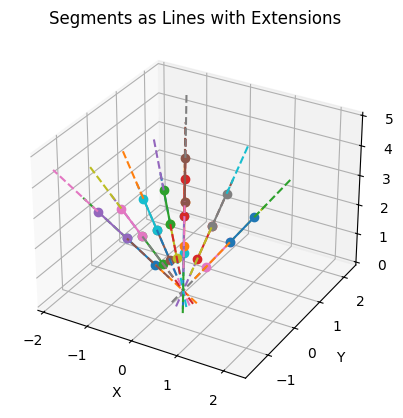

In [105]:
a = 0  # Set your desired lower limit for the Z axis
b = 5  # Set your desired upper limit for the Z axis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for segment in segments:
    hit_from = segment.hit_from
    hit_to = segment.hit_to
    ax.plot([hit_from.x, hit_to.x], [hit_from.y, hit_to.y], [hit_from.z, hit_to.z], marker='o')
    
    # Extend the vectors in both directions
    extension_factor = 1.5
    extended_x1 = hit_from.x - extension_factor * (hit_to.x - hit_from.x)
    extended_y1 = hit_from.y - extension_factor * (hit_to.y - hit_from.y)
    extended_z1 = hit_from.z - extension_factor * (hit_to.z - hit_from.z)
    extended_x2 = hit_to.x + extension_factor * (hit_to.x - hit_from.x)
    extended_y2 = hit_to.y + extension_factor * (hit_to.y - hit_from.y)
    extended_z2 = hit_to.z + extension_factor * (hit_to.z - hit_from.z)
    
    ax.plot([extended_x1, hit_from.x], [extended_y1, hit_from.y], [extended_z1, hit_from.z], linestyle='dashed')
    ax.plot([hit_to.x, extended_x2], [hit_to.y, extended_y2], [hit_to.z, extended_z2], linestyle='dashed')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Segments as Lines with Extensions')
ax.set_zlim(a, b)  # Set the Z axis limits
plt.show()
